In [38]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

In [2]:
def build_df():
    filepath = os.path.join(DIRNAME_BIG, FILENAME_BIG)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--batch-size', '--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel', '--stacked-kernel', '--sumed-kernel', '--svhn',
       '--tensorboard', '--validation-size',
       'deepfriedconvnet', 'deepstrom','dense', "--gamma", "--nb-stack", 
                     "--non-linear", "--non-linearity", "--num-epoch", "--seed",
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation", "--real-fastfood", "--real-nystrom"
            ]
    for c in col_to_delete:
        df = df.drop([c], axis=1)

    return df

DIRNAME_BIG = "/home/luc/Resultats/Deepstrom/october_2018/classif_end_to_end"
FILENAME_BIG = "gathered_results.csv"
df = build_df()

In [3]:
def get_sorted_acc_for_dataset(df_, dataset):
    df_dataset = df_[df_.dataset == dataset]
    df_dataset = df_dataset.sort_values(by="test_acc", ascending=False)
    return df_dataset

In [4]:
get_sorted_acc_for_dataset(df, "mnist")

--nys-size --out-dim dataset    kernel    network  test_acc  test_eval_time  training_time  val_acc  val_eval_time
53       None      1024   mnist      None      dense    0.9908        0.046835     692.606522   0.9908       0.093102
25       None       128   mnist      None      dense    0.9879        0.059532     647.076592   0.9888       0.070084
45       None        64   mnist      None      dense    0.9874        0.058991     643.130677   0.9887       0.068697
68        256      None   mnist    linear  deepstrom    0.9852        0.052776    1258.943433   0.9846       0.103054
18        128      None   mnist    linear  deepstrom    0.9845        0.064160    1008.505888   0.9848       0.079071
59       None        16   mnist      None      dense    0.9838        0.063164     637.988250   0.9849       0.078794
41         64      None   mnist    linear  deepstrom    0.9816        0.044161     864.483099   0.9813       0.093081
63        512      None   mnist    linear  deepstrom    0.9813        0.064762    1815.580290   0.9813       0.115415
13         16      None   mnist    linear  deepstrom    0.9813        0.043917     773.847790   0.9783       0.092328
0         128      None   mnist  chi2_cpd  deepstrom    0.9813        0.186224    1401.125618   0.9782       0.202431
24         64      None   mnist  chi2_cpd  deepstrom    0.9795        0.121712    1100.418470   0.9778       0.136375
39        256      None   mnist  chi2_cpd  deepstrom    0.9792        0.300938    1987.493944   0.9801       0.326709
26         16      None   mnist  chi2_cpd  deepstrom    0.9789        0.058784     871.508166   0.9780       0.109170
14        512      None   mnist  chi2_cpd  deepstrom    0.9758        0.564625    3119.552520   0.9751       0.616923
35          8      None   mnist    linear  deepstrom    0.9729        0.059439     727.739111   0.9707       0.070918
37          8      None   mnist  chi2_cpd  deepstrom    0.9718        0.066200     804.819344   0.9663       0.079810
58          4      None   mnist    linear  deepstrom    0.9498        0.059206     728.185049   0.9453       0.072418
70          4      None   mnist  chi2_cpd  deepstrom    0.9456        0.047744     750.139674   0.9452       0.091661

In [5]:
get_sorted_acc_for_dataset(df, "cifar10")

--nys-size --out-dim  dataset    kernel    network  test_acc  test_eval_time  training_time  val_acc  val_eval_time
38       None        64  cifar10      None      dense    0.7776        3.851561   14389.172500   0.7790       6.267717
55       None       128  cifar10      None      dense    0.7656        3.849130   14380.838030   0.7683       6.270864
52       None      1024  cifar10      None      dense    0.7643        3.862283   14470.796952   0.7606       6.280409
7        None        16  cifar10      None      dense    0.7588        3.575382   14157.014869   0.7657       5.747157
51        512      None  cifar10  chi2_cpd  deepstrom    0.7479        6.846244   87033.216096   0.7405       9.329525
22          4      None  cifar10  chi2_cpd  deepstrom    0.7433        4.010236   19910.613283   0.7361       6.501417
43        256      None  cifar10  chi2_cpd  deepstrom    0.7405        5.432825   53063.696264   0.7363       7.898510
36        128      None  cifar10  chi2_cpd  deepstrom    0.7379        4.370653   34882.018647   0.7358       6.602529
2          16      None  cifar10  chi2_cpd  deepstrom    0.7306        4.136106   22086.981499   0.7336       6.612154
20         64      None  cifar10  chi2_cpd  deepstrom    0.7257        3.999178   27069.076405   0.7262       6.233111
46          8      None  cifar10  chi2_cpd  deepstrom    0.7246        4.051840   21110.480839   0.7287       6.506875
31          4      None  cifar10    linear  deepstrom    0.1000        4.011486   19580.249264   0.0947       6.453061
28          8      None  cifar10    linear  deepstrom    0.1000        3.999425   20588.263982   0.0947       6.449730
47        512      None  cifar10    linear  deepstrom    0.1000        5.874875   82356.760107   0.0947       8.360661
23        256      None  cifar10    linear  deepstrom    0.1000        4.876681   50572.784957   0.0947       7.366312
11        128      None  cifar10    linear  deepstrom    0.1000        4.089114   34239.797556   0.0947       6.307771
66         16      None  cifar10    linear  deepstrom    0.1000        3.705690   21834.584799   0.0947       5.931691
67         64      None  cifar10    linear  deepstrom    0.1000        3.857690   26705.858757   0.0947       6.085833

In [6]:
get_sorted_acc_for_dataset(df, "cifar100")

--nys-size --out-dim   dataset    kernel    network  test_acc  test_eval_time  training_time  val_acc  val_eval_time
50       None      1024  cifar100      None      dense    0.3479        3.547975   14130.525702   0.3364       5.697969
16       None       128  cifar100      None      dense    0.3388        3.524847   14074.119773   0.3329       5.684675
3          64      None  cifar100  chi2_cpd  deepstrom    0.2585        4.339325   27720.096254   0.2508       6.800864
57          4      None  cifar100  chi2_cpd  deepstrom    0.2043        3.971535   19768.391855   0.1966       6.418263
29        256      None  cifar100  chi2_cpd  deepstrom    0.1991        5.475031   53419.870877   0.1887       7.927623
27        128      None  cifar100  chi2_cpd  deepstrom    0.1983        4.717442   36788.966420   0.1876       7.193454
40         16      None  cifar100  chi2_cpd  deepstrom    0.1952        3.694020   21831.538531   0.1890       5.934045
62          8      None  cifar100  chi2_cpd  deepstrom    0.1623        3.718879   20875.334670   0.1606       5.946196
64        512      None  cifar100  chi2_cpd  deepstrom    0.1587        6.489950   81977.486589   0.1563       8.722982
61       None        64  cifar100      None      dense    0.0100        3.809767   14162.506632   0.0083       6.197990
54        256      None  cifar100    linear  deepstrom    0.0100        4.521444   48345.980519   0.0083       6.749054
1           8      None  cifar100    linear  deepstrom    0.0100        3.634902   20741.875956   0.0083       5.885382
49         16      None  cifar100    linear  deepstrom    0.0100        3.655856   21732.213368   0.0083       5.886336
33         64      None  cifar100    linear  deepstrom    0.0100        4.235058   26857.990116   0.0083       6.687950
21       None        16  cifar100      None      dense    0.0100        3.837857   14150.901807   0.0083       6.251673
10        512      None  cifar100    linear  deepstrom    0.0100        5.467176   78125.019147   0.0083       7.815155
9         128      None  cifar100    linear  deepstrom    0.0100        4.414209   35154.659761   0.0083       6.863228
69          4      None  cifar100    linear  deepstrom    0.0100        3.613290   19602.906152   0.0083       5.825223

In [7]:
get_sorted_acc_for_dataset(df, "svhn")

--nys-size --out-dim dataset    kernel    network  test_acc  test_eval_time  training_time  val_acc  val_eval_time
8        None       128    svhn      None      dense  0.941009        9.443329   22538.016228   0.9339       5.747079
32       None        16    svhn      None      dense  0.940815        9.270262   22534.473243   0.9361       5.683755
6        None        64    svhn      None      dense  0.940787        9.433461   22535.162152   0.9350       5.748816
44        256      None    svhn  chi2_cpd  deepstrom  0.937454       14.281184   83866.884516   0.9326       7.820895
30        512      None    svhn  chi2_cpd  deepstrom  0.937407       18.118679  137458.785191   0.9312       9.242190
56       None      1024    svhn      None      dense  0.937000       10.360103   23155.441453   0.9342       6.369419
5         512      None    svhn    linear  deepstrom  0.936324       15.367678  133449.591165   0.9303       8.193455
65        128      None    svhn  chi2_cpd  deepstrom  0.935120       12.290664   57845.390112   0.9309       7.054313
17         64      None    svhn    linear  deepstrom  0.933824       11.180088   43996.453977   0.9315       6.699816
19          8      None    svhn  chi2_cpd  deepstrom  0.932556        9.698029   33257.878631   0.9280       5.919757
15         64      None    svhn  chi2_cpd  deepstrom  0.931815       10.448107   42970.862907   0.9307       6.198442
48        128      None    svhn    linear  deepstrom  0.931787       11.711458   56833.877055   0.9291       6.837168
34          4      None    svhn  chi2_cpd  deepstrom  0.931528        9.722512   31789.523167   0.9292       5.931942
4          16      None    svhn  chi2_cpd  deepstrom  0.929741        9.828513   34855.966583   0.9305       5.963734
42         16      None    svhn    linear  deepstrom  0.196694        9.705651   34650.985853   0.1881       5.946775
12          8      None    svhn    linear  deepstrom  0.196694        9.592059   33089.771927   0.1881       5.880033
60          4      None    svhn    linear  deepstrom  0.196694        9.709503   31571.430093   0.1881       5.931994

In [10]:
method_names = set(df["network"].values)
kernel_names = set(df["kernel"].values)
kernel_names.remove("None")
repr_dim = set(df["--out-dim"].values)
repr_dim.remove("None")  # dtype: str
nys_size = set(df["--nys-size"].values)
nys_size.remove("None")
datasets = set(df["dataset"])

logger.debug("Nystrom possible sizes are: {}".format(nys_size))
logger.debug("Kernel functions are: {}".format(kernel_names))
logger.debug("Compared network types are: {}".format(method_names))
logger.debug("Tested representation dimension are: {}".format(repr_dim))

2018-11-07 09:46:39,143 [16826] DEBUG    root: Nystrom possible sizes are: {'4', '512', '8', '256', '128', '64', '16'}
2018-11-07 09:46:39,145 [16826] DEBUG    root: Kernel functions are: {'linear', 'chi2_cpd'}
2018-11-07 09:46:39,146 [16826] DEBUG    root: Compared network types are: {'deepstrom', 'dense'}
2018-11-07 09:46:39,147 [16826] DEBUG    root: Tested representation dimension are: {'1024', '128', '64', '16'}


In [43]:
nb_classes_datasets = {
    "svhn": 10,
    "cifar10": 10,
    "mnist": 10,
    "cifar100": 100
}

nb_feature_convs = {
    "svhn": 512,
    "cifar10": 512,
    "mnist": 16,
    "cifar100": 512
}

min_acc = 0
max_acc = 1

In [46]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)

    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

NameError: name '__file__' is not defined

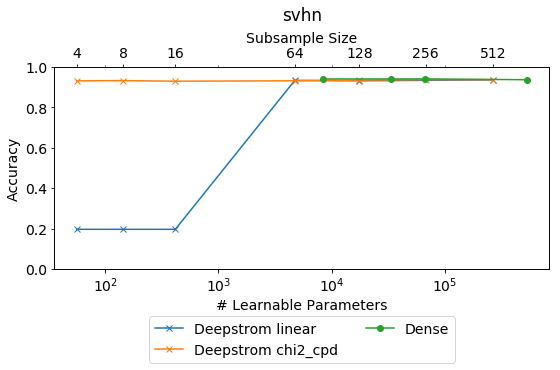

In [47]:
for DATANAME in datasets:
    df_data = df[df["dataset"] == DATANAME]
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        accuracies_kernel = df_kernel["test_acc"]
        subsample_sizes_kernel = df_kernel["--nys-size"].astype(int)
        np_param = (np.square(subsample_sizes_kernel) +  # m x m
                    subsample_sizes_kernel * nb_classes_dataset)  # m x c
        sorted_idx = np.argsort(np_param.values)
        ax.plot(np_param.values[sorted_idx], accuracies_kernel.values[sorted_idx], marker="x", label=f"Deepstrom {k_name}")
    
    df_dense = df_data[df_data["network"] == "dense"]
    accuracies_dense = df_dense["test_acc"]
    out_dim_dense = df_dense["--out-dim"].astype(int)
    np_param_dense = (nb_feature_conv * out_dim_dense +  # d x D
                out_dim_dense * nb_classes_dataset)  # D x c
    sorted_idx_dense = np.argsort(np_param_dense.values)
    ax.plot(np_param_dense.values[sorted_idx_dense], accuracies_dense.values[sorted_idx_dense], marker="o", label=f"Dense")
    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)